#  Astronomy in Julia - ESI Optimizations

## Christopher Figueroa and Sai Teja Muliki

In [1]:
using Pkg

In [2]:
Pkg.activate("/home/chris/Desktop/School/CS518/Julia/neural_pdes")

  Activating project at `~/Desktop/School/CS518/Julia/neural_pdes`


In [6]:
Pkg.add("Plots") # the package needed for graphs

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/School/CS518/Julia/neural_pdes/Project.toml`
  No Changes to `~/Desktop/School/CS518/Julia/neural_pdes/Manifest.toml`


In [3]:
using Plots # uses the Plots package

In [6]:
Pkg.add("XLSX") # the package needed for excel sheet reading

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed EzXML ─ v1.1.0
   Installed XLSX ── v0.9.0
    Updating `~/Desktop/School/CS518/Julia/neural_pdes/Project.toml`
  [fdbf4ff8] + XLSX v0.9.0
    Updating `~/Desktop/School/CS518/Julia/neural_pdes/Manifest.toml`
  [8f5d6c58] + EzXML v1.1.0
  [fdbf4ff8] + XLSX v0.9.0
Precompiling project...
  ✓ EzXML
  ✓ XLSX
  ✓ neural_pdes
  3 dependencies successfully precompiled in 18 seconds. 400 already precompiled.


In [4]:
# package and syntax source: https://www.geeksforgeeks.org/working-with-excel-files-in-julia/
using XLSX

### Creates a 2D matrix from the input of the Planet Data Excel file

In [5]:
# Manually defines the row and column sizes of the input Excel sheet
num_rows = 64
num_cols = 11

# Create an empty 2D matrix with dimensions num_rows x num_cols
matrix = Array{String}(undef, num_rows, num_cols)

64×11 Matrix{String}:
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
   

In [6]:
# Open the Excel file
XLSX.openxlsx("Planet_Data.xlsx", enable_cache=false) do f
    sheet = f["Sheet1"] # changing sheet name leads to error

    # Loop through each row in the sheet
    for r in XLSX.eachrow(sheet)
        # Get the row number
        rn = XLSX.row_number(r)

        # Loop through each column in the row
        for i in 1:num_cols
            # Read the content from the cell and convert to string before saving to the matrix
            matrix[rn, i] = string(r[i])
        end
    end

    # Print the matrix with each row on a new line
    println("Matrix:")
    for i in 1:num_rows
        println(join(matrix[i, :], "\t"))
    end
end

Matrix:
Name	Stellar Flux	Radius	Planet Mass	Temperature	Density	Escape Velocity	Gravity	Star Temperature	Star Mass	Orbital Period
Earth	1	1	1	288	5.509373863636364	11.18747466503649	9.82	5778	1	365
Mars	0.431	0.532	0.107	210	3.915174516199075	5.017277678960889	3.7125473458081286	5778	1	687
Venus	1.92	0.949	0.815	737	5.253650959246789	10.367588779332621	8.886621267353691	5778	1	225
Jupiter	0.00599	10.973	318	165	1.3260296249406163	60.225849594375575	25.935095371621628	5778	1	4333
Kepler-1638 b	1.39	1.87	4.16	312	3.504860649337125	16.68621852536033	11.68211844776802	5710	0.97	259.3
Kepler-440 b	1.44	1.91	4.13	308	3.2655188445391983	16.450928205370104	11.117184287711412	3813	0.57	101
GJ 433 d	1.06	2.14	5.22	292	2.9344818475945154	17.472716469574635	11.193204646694033	3600	0.467	36.1
Kepler-1653 b	1.04	2.17	5.34	291	2.8791500545949402	17.549826463275437	11.136103973327105	4771	0.719	140.3
GJ 832 c	0.99	2.19	5.4	286	2.83245917974606	17.56737561915611	11.056483392756617	3657	0.437	35.7
Kepl

### Uses the data in the Excel sheet to calculate the 4 ESI standard variants

In [7]:
# ESI Equation source: https://phl.upr.edu/projects/earth-similarity-index-esi

# Defines a matrix to house the 4 variants of the ESI equations
# the 5th column is for the 5th iterative variant of the ESI
esi = Array{Float64}(undef, 63, 5)

# Fill the matrix with 0.0
fill!(esi, 0.0)

63×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 ⋮                   
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [8]:
# defines the functions that represent the 4 original ESI equations

# defines the ESI Standard equation
function esi_standard(f, r)
    # Calculate the intermediate values
    val1 = ((f-1)/(f+1))^2
    val2 = ((r-1)/(r+1))^2
    
    # Calculate the final result
    result = 1 - sqrt(0.5*(val1 + val2))
    return result
end

esi_standard (generic function with 1 method)

In [9]:
# the ESI Weighted equation
function esi_weighted(f, r, d, e, t)
    # Calculate the intermediate values
    val1 = ((f-1)/(f+1))^2
    val2 = 0.57 * ((r-1)/(r+1))^2
    val3 = 1.07 * ((d-5.51)/(d+5.51))^2
    val4 = 0.7 * ((e-11.186)/(e+11.186))^2
    val5 = 5.58 * ((t-288)/(t+288))^2
    
    # Calculate the final result
    result = 1 - sqrt(0.2*(val1 + val2 + val3 + val4 + val5))
    return result
end

esi_weighted (generic function with 1 method)

In [10]:
# the ESI Custom equation
function esi_custom(f, r, d, t, g, m, k, s, o)
    # Calculate the intermediate values
    val1 = ((f-1)/(f+1))^2
    val2 = ((r-1)/(r+1))^2
    val3 = ((d-5.51)/(d+5.51))^2
    val4 = ((t-288)/(t+288))^2
    val5 = ((g-9.82)/(g+9.82))^2
    val6 = ((m-1)/(m+1))^2
    val7 = ((k-5778)/(k+5778))^2
    val8 = ((s-1)/(s+1))^2
    val9 = ((o-365)/(o+365))^2
    
    # Calculate the final result
    result = 1 - sqrt((1/9)*(val1 + val2 + val3 + val4 + val5 + val6 + val7 + val8 + val9))
    return result
end

esi_custom (generic function with 1 method)

In [11]:
# the ESI Revised equation
function esi_revised(f, r, d, t, g, m, k, s, o)
    # Calculate the intermediate values
    val1 = 3.2 * ((f-1)/(f+1))^2
    val2 = 0.57 * ((r-1)/(r+1))^2
    val3 = 2.8 * ((d-5.51)/(d+5.51))^2
    val4 = 10.58 * ((t-288)/(t+288))^2
    val5 = 4.75 * ((g-9.82)/(g+9.82))^2
    val6 = 0.2 * ((m-1)/(m+1))^2
    val7 = ((k-5778)/(k+5778))^2
    val8 = ((s-1)/(s+1))^2
    val9 = ((o-365)/(o+365))^2
    
    # Calculate the final result
    result = 1 - sqrt((1/9)*(val1 + val2 + val3 + val4 + val5 + val6 + val7 + val8 + val9))
    return result
end

esi_revised (generic function with 1 method)

In [12]:
# Uses the columns from the first matrix to calculate the values of the ESI matrix
flux = 0.0
radius = 0.0
mass = 0.0
temp = 0.0
density = 0.0
escape = 0.0
gravity = 0.0
stemp = 0.0
smass = 0.0
orbit = 0.0

# Loops from the second row of the first matrix to the end
for r in 2:64

    # Stores the values of the ESI variables
    flux = parse(Float64, matrix[r,2])
    radius = parse(Float64, matrix[r,3])
    mass = parse(Float64, matrix[r,4])
    temp = parse(Float64, matrix[r,5])
    density = parse(Float64, matrix[r,6])
    escape = parse(Float64, matrix[r,7])
    gravity = parse(Float64, matrix[r,8])
    stemp = parse(Float64, matrix[r,9])
    smass = parse(Float64, matrix[r,10])
    orbit = parse(Float64, matrix[r,11])      

    # Fills in values of the ESI Standard equation
    esi[r-1,1] = esi_standard(flux, radius)
    # values for the ESI Weighted equation
    esi[r-1,2] = esi_weighted(flux, radius, density, escape, temp)
    # ESI Custom equation
    esi[r-1,3] = esi_custom(flux, radius, density, temp, gravity, mass, stemp, smass, orbit)
    # ESI Revised equation
    esi[r-1,4] = esi_revised(flux, radius, density, temp, gravity, mass, stemp, smass, orbit)
end

In [13]:
esi

63×5 Matrix{Float64}:
 1.0        0.999964  0.999981  0.999968  0.0
 0.645441   0.690072  0.626919  0.518084  0.0
 0.776446   0.515851  0.799558  0.481454  0.0
 0.0861776  0.2909    0.331463  0.10406   0.0
 0.756567   0.816626  0.745908  0.780758  0.0
 0.744747   0.805094  0.664856  0.68633   0.0
 0.742455   0.795323  0.585186  0.618557  0.0
 0.738649   0.791317  0.676632  0.721001  0.0
 0.736196   0.788286  0.578656  0.611475  0.0
 0.731418   0.788633  0.610271  0.638607  0.0
 0.658776   0.740075  0.614463  0.580722  0.0
 0.847141   0.88139   0.54314   0.525756  0.0
 0.836715   0.882335  0.751276  0.748975  0.0
 ⋮                                        
 0.932499   0.946373  0.672921  0.671695  0.0
 0.924217   0.944491  0.61213   0.608327  0.0
 0.659082   0.719866  0.652928  0.670835  0.0
 0.658776   0.740075  0.614463  0.580722  0.0
 0.652481   0.711549  0.571381  0.592684  0.0
 0.647137   0.733022  0.560118  0.533983  0.0
 0.632538   0.689303  0.612246  0.63381   0.0
 0.674539   0.7

### Sets up the iterative method to estimate the weights of the ESI Iterative equation

In [14]:
# source: https://docs.juliahub.com/IterativeSolvers/ef2NV/0.8.5/iterators/

# Sets the default values of the ESI weights to 1.0
w_flux = 1.0
w_radius = 1.0
w_mass = 1.0
w_temp = 1.0
w_density = 1.0
w_escape = 1.0
w_gravity = 1.0
w_stemp = 1.0
w_smass = 1.0
w_orbit = 1.0

1.0

In [15]:
# Sample values for input parameters
f = 1.2
r = 1.1
d = 5.6
e = 11.2
t = 290.0
g = 9.8
m = 1.5
k = 5800.0
s = 1.2
o = 370.0

370.0

In [16]:
# uses all 10 variables instead of the 9 of ESI Revised

# the ESI Custom equation
function esi_iterative(f, r, d, e, t, g, m, k, s, o)
    # Calculate the intermediate values
    val1 = w_flux * ((f-1)/(f+1))^2
    val2 = w_radius * ((r-1)/(r+1))^2
    val3 = w_density * ((d-5.51)/(d+5.51))^2
    val4 = w_escape * ((e-11.186)/(e+11.186))^2
    val5 = w_temp * ((t-288)/(t+288))^2
    val6 = w_gravity * ((g-9.82)/(g+9.82))^2
    val7 = w_mass * ((m-1)/(m+1))^2
    val8 = w_stemp * ((k-5778)/(k+5778))^2
    val9 = w_smass * ((s-1)/(s+1))^2
    val10 = w_orbit * ((o-365)/(o+365))^2
    
    # Calculate the final result
    result = 1 - sqrt((1/10)*(val1 + val2 + val3 + val4 + val5 + val6 + val7 + val8 + val9 + val10))
    return result
end

esi_iterative (generic function with 1 method)

In [17]:
# Iterative method to update the weights
num_iterations = 10  # Number of iterations
step_size = 0.1  # Step size for weight updates

for i in 1:num_iterations
    # Calculate the current ESI with current weights
    current_esi = esi_iterative(f, r, d, e, t, g, m, k, s, o)
    println("Iteration $i - Current ESI: $current_esi")
    
    # Update the weights with values ranging from 0.1 to 20
    w_flux += step_size * (0.1 + 19.9 * abs(randn()))
    w_radius += step_size * (0.1 + 19.9 * abs(randn()))
    w_mass += step_size * (0.1 + 19.9 * abs(randn()))
    w_temp += step_size * (0.1 + 19.9 * abs(randn()))
    w_density += step_size * (0.1 + 19.9 * abs(randn()))
    w_escape += step_size * (0.1 + 19.9 * abs(randn()))
    w_gravity += step_size * (0.1 + 19.9 * abs(randn()))
    w_stemp += step_size * (0.1 + 19.9 * abs(randn()))
    w_smass += step_size * (0.1 + 19.9 * abs(randn()))
    w_orbit += step_size * (0.1 + 19.9 * abs(randn()))
end

# Final values of the weights after iterations
println("Final Weights:")
println("w_flux: $w_flux")
println("w_radius: $w_radius")
println("w_mass: $w_mass")
println("w_temp: $w_temp")
println("w_density: $w_density")
println("w_escape: $w_escape")
println("w_gravity: $w_gravity")
println("w_stemp: $w_stemp")
println("w_smass: $w_smass")
println("w_orbit: $w_orbit")

Iteration 1 - Current ESI: 0.9232371096775801
Iteration 2 - Current ESI: 0.8925085508181153
Iteration 3 - Current ESI: 0.8518831964748539
Iteration 4 - Current ESI: 0.8276726393333582
Iteration 5 - Current ESI: 0.8120504817902383
Iteration 6 - Current ESI: 0.7887461754104491
Iteration 7 - Current ESI: 0.7714214284097879
Iteration 8 - Current ESI: 0.7524738864690073
Iteration 9 - Current ESI: 0.7235644603202622
Iteration 10 - Current ESI: 0.6965823414916765
Final Weights:
w_flux: 16.208106361406877
w_radius: 23.430476265057074
w_mass: 15.512994610725093
w_temp: 14.687019415744073
w_density: 11.4709351672043
w_escape: 12.646448327161451
w_gravity: 17.26164060843681
w_stemp: 17.293694510065087
w_smass: 17.456282249627883
w_orbit: 16.61187082284264


In [18]:
# Loops from the second row of the first matrix to the end
for r in 2:64

    # Stores the values of the ESI variables
    flux = parse(Float64, matrix[r,2])
    radius = parse(Float64, matrix[r,3])
    mass = parse(Float64, matrix[r,4])
    temp = parse(Float64, matrix[r,5])
    density = parse(Float64, matrix[r,6])
    escape = parse(Float64, matrix[r,7])
    gravity = parse(Float64, matrix[r,8])
    stemp = parse(Float64, matrix[r,9])
    smass = parse(Float64, matrix[r,10])
    orbit = parse(Float64, matrix[r,11])      

    # ESI Iterative equation
    esi[r-1,5] = esi_iterative(flux, radius, density, escape, temp, gravity, mass, stemp, smass, orbit)
end

In [19]:
esi

63×5 Matrix{Float64}:
 1.0        0.999964  0.999981  0.999968   0.999904
 0.645441   0.690072  0.626919  0.518084  -0.497932
 0.776446   0.515851  0.799558  0.481454   0.25117
 0.0861776  0.2909    0.331463  0.10406   -1.72214
 0.756567   0.816626  0.745908  0.780758  -0.00480768
 0.744747   0.805094  0.664856  0.68633   -0.313483
 0.742455   0.795323  0.585186  0.618557  -0.624797
 0.738649   0.791317  0.676632  0.721001  -0.272525
 0.736196   0.788286  0.578656  0.611475  -0.65019
 0.731418   0.788633  0.610271  0.638607  -0.527225
 0.658776   0.740075  0.614463  0.580722  -0.507773
 0.847141   0.88139   0.54314   0.525756  -0.786033
 0.836715   0.882335  0.751276  0.748975   0.025953
 ⋮                                        
 0.932499   0.946373  0.672921  0.671695  -0.274157
 0.924217   0.944491  0.61213   0.608327  -0.514173
 0.659082   0.719866  0.652928  0.670835  -0.364388
 0.658776   0.740075  0.614463  0.580722  -0.507773
 0.652481   0.711549  0.571381  0.592684  -0.679175


### Sets up the graph visuals and the neural network imports

In [89]:
### source: https://medium.com/coffee-in-a-klein-bottle/deep-learning-with-julia-e7f15ad5080b

Pkg.add("Flux") # the package needed for neural networks

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Flux ─ v0.13.13
    Updating `~/Desktop/School/CS518/Julia/neural_pdes/Project.toml`
⌃ [587475ba] + Flux v0.13.13
    Updating `~/Desktop/School/CS518/Julia/neural_pdes/Manifest.toml`
⌃ [587475ba] ↑ Flux v0.13.11 ⇒ v0.13.13
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
  ✓ Flux
  ✓ GeometricFlux
  ✓ NeuralPDE
  ✓ neural_pdes
  4 dependencies successfully precompiled in 102 seconds. 412 already precompiled.


In [20]:
using Flux

In [21]:
using Statistics # another package needed for the neural network operations

In [22]:
# names of first row of esi matrix
esi_names = ["ESI Standard","ESI Weighted","ESI Custom","ESI Revised","ESI Iterative"]
esi_names_array = reshape(esi_names, 1, 5)  # Reshape esi_names into a 1x5 array

# combines the names and esi arrays into one array
esi_titled = [esi_names_array;string.(esi)]

64×5 Matrix{String}:
 "ESI Standard"         "ESI Weighted"        …  "ESI Iterative"
 "1.0"                  "0.999963956442029"      "0.9999040959483798"
 "0.6454405851390033"   "0.6900715839903709"     "-0.4979321567400934"
 "0.7764458889355285"   "0.5158507259248103"     "0.25117000718237104"
 "0.08617762708866905"  "0.2908996362820583"     "-1.7221421220439233"
 "0.7565672043588956"   "0.8166263215400378"  …  "-0.004807680915772883"
 "0.7447465261655971"   "0.8050939628337148"     "-0.31348303470958294"
 "0.7424548996401283"   "0.7953229678335811"     "-0.6247968533436286"
 "0.7386493420601503"   "0.7913169640472171"     "-0.27252500830063564"
 "0.7361964226908103"   "0.7882859095388763"     "-0.6501895087878005"
 "0.7314182300254973"   "0.7886331539345981"  …  "-0.5272253633593231"
 "0.6587763043380053"   "0.7400748113185567"     "-0.5077728091601814"
 "0.8471413729243857"   "0.8813900821414002"     "-0.7860328347601393"
 ⋮                                            ⋱  
 "0.93249

In [23]:
# combines the planet data matrix with the esi_titled matrix
planet_data = hcat(matrix, esi_titled)

64×16 Matrix{String}:
 "Name"                "Stellar Flux"  "Radius"  …  "ESI Iterative"
 "Earth"               "1"             "1"          "0.9999040959483798"
 "Mars"                "0.431"         "0.532"      "-0.4979321567400934"
 "Venus"               "1.92"          "0.949"      "0.25117000718237104"
 "Jupiter"             "0.00599"       "10.973"     "-1.7221421220439233"
 "Kepler-1638 b"       "1.39"          "1.87"    …  "-0.004807680915772883"
 "Kepler-440 b"        "1.44"          "1.91"       "-0.31348303470958294"
 "GJ 433 d"            "1.06"          "2.14"       "-0.6247968533436286"
 "Kepler-1653 b"       "1.04"          "2.17"       "-0.27252500830063564"
 "GJ 832 c"            "0.99"          "2.19"       "-0.6501895087878005"
 "Kepler-705 b"        "0.77"          "2.11"    …  "-0.5272253633593231"
 "Kepler-296 e"        "0.44"          "1.8"        "-0.5077728091601814"
 "Trappist-1 e"        "0.65"          "0.92"       "-0.7860328347601393"
 ⋮                 

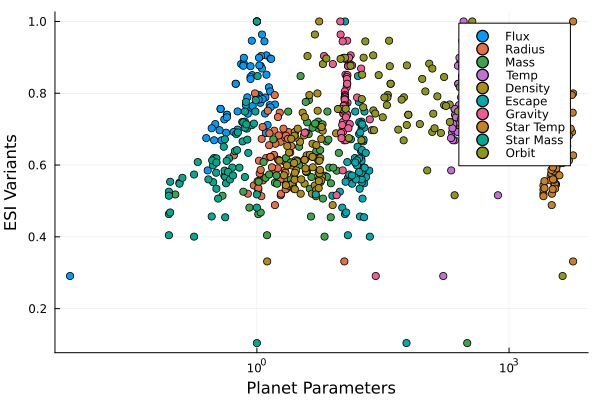

In [24]:
# Extract columns with string data for scatter plot, skipping the first row
x_str = planet_data[2:end, 2:11]  # Assuming string x values are in the second column
y_str = planet_data[2:end, 13:15]  # Assuming string y values are in the third column

# Convert string data to floats
x = parse.(Float64, x_str)  # Convert x_str to Float64 array
y = parse.(Float64, y_str)  # Convert y_str to Float64 array

# Create scatter plot with converted numerical data
scatter(x, y, xlabel="Planet Parameters", ylabel="ESI Variants", legend=:topright, xscale=:log10, 
label=["Flux" "Radius" "Mass" "Temp" "Density" "Escape" "Gravity" "Star Temp" "Star Mass" "Orbit"])

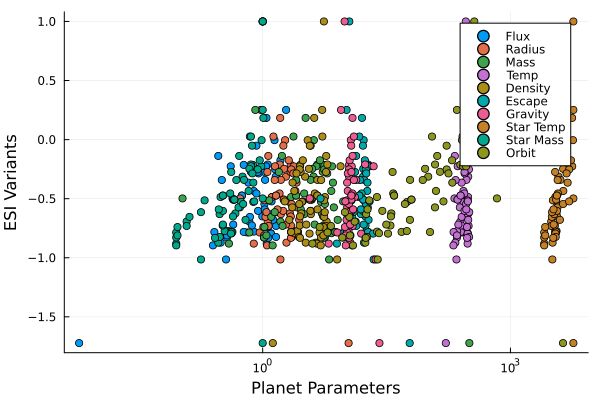

In [25]:
# visualizes the ESI Iterative equation for comparison

x_str = planet_data[2:end, 2:11]  # Assuming string x values are in the second column
y_str = planet_data[2:end, 16]  # Assuming string y values are in the third column

# Convert string data to floats
x = parse.(Float64, x_str)  # Convert x_str to Float64 array
y = parse.(Float64, y_str)  # Convert y_str to Float64 array

# Create scatter plot with converted numerical data
scatter(x, y, xlabel="Planet Parameters", ylabel="ESI Variants", legend=:topright, xscale=:log10, 
label=["Flux" "Radius" "Mass" "Temp" "Density" "Escape" "Gravity" "Star Temp" "Star Mass" "Orbit"])

In [26]:
# loops through the data
for r in 2:64
    # finds the columns of the parameters
    flux = parse(Float64, matrix[r,2])
    radius = parse(Float64, matrix[r,3])
    mass = parse(Float64, matrix[r,4])
    temp = parse(Float64, matrix[r,5])
    density = parse(Float64, matrix[r,6])
    escape = parse(Float64, matrix[r,7])
    gravity = parse(Float64, matrix[r,8])
    stemp = parse(Float64, matrix[r,9])
    smass = parse(Float64, matrix[r,10])
    orbit = parse(Float64, matrix[r,11])
    
    # filters out by parameters
    if ((flux < 1.3) && (radius < 1.4) && (mass < 3) && (temp < 310) && (density > 5) &&
        (escape < 16) && (gravity < 13) && (stemp > 4000) && (smass > 0.5) && (orbit > 100))
        print(matrix[r,:],"\t")
    end
    
    # Kepler-442 b should be the planet most similar to Earth
    
end

["Earth", "1", "1", "1", "288", "5.509373863636364", "11.18747466503649", "9.82", "5778", "1", "365"]	["Kepler-442 b", "0.7", "1.35", "2.36", "263", "5.284609995704646", "14.79180531237098", "12.716159122085047", "4563", "0.72", "112.3"]	

### Trains the neural network to improve the accuracy of the ESI iterative equation

In [27]:
# creates the 2 layers of the neural network
model = Chain(
    Dense(10, 64, relu),
    Dense(64, 32, relu),
    Dense(32, 1)
)

Chain(
  Dense(10 => 64, relu),                # 704 parameters
  Dense(64 => 32, relu),                # 2_080 parameters
  Dense(32 => 1),                       # 33 parameters
)                   # Total: 6 arrays, 2_817 parameters, 11.379 KiB.

In [28]:
# Define the loss function
loss(x, y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

In [39]:
# Defines the input data of Kepler-442 b
flux = 0.7
radius = 1.35
mass = 2.36
temp = 263
density = 5.284
escape = 14.792
gravity = 12.716
stemp = 4563
smass = 0.72
orbit = 112.3

112.3

In [40]:
# Define a function to calculate the loss (e.g., mean squared error)
function loss_function(y_pred, y_true)
    return Flux.mse(y_pred, y_true)
end

loss_function (generic function with 1 method)

In [41]:
# Define the target ESI value (ground truth)
# the expected ESI value for Kepler-442 b
target_esi = 0.95

# Define the optimizer (e.g., gradient descent with a learning rate of 0.01)
optimizer = Flux.ADAM(0.01)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [42]:
# defines the selected index to be modified
modify = 1

# defines a list of variable weights
weights = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

# define the best weights so far
best_weights = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

10-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [43]:
# a revised version of the iterative equation, uses the list of weights instead of the weight varaibles

function esi_iterative(f, r, d, e, t, g, m, k, s, o)
    # Calculate the intermediate values
    val1 = abs(weights[1] * ((f-1)/(f+1))^2)
    val2 = abs(weights[2] * ((r-1)/(r+1))^2)
    val3 = abs(weights[7] * ((m-1)/(m+1))^2)
    val4 = abs(weights[5] * ((t-288)/(t+288))^2)
    val5 = abs(weights[3] * ((d-5.51)/(d+5.51))^2)
    val6 = abs(weights[4] * ((e-11.186)/(e+11.186))^2)
    val7 = abs(weights[6] * ((g-9.82)/(g+9.82))^2)
    val8 = abs(weights[8] * ((k-5778)/(k+5778))^2)
    val9 = abs(weights[9] * ((s-1)/(s+1))^2)
    val10 = abs(weights[10] * ((o-365)/(o+365))^2)
    
    # Calculate the final result
    result = 1 - sqrt((1/10)*(val1 + val2 + val3 + val4 + val5 + val6 + val7 + val8 + val9 + val10))
    return result
end

esi_iterative (generic function with 1 method)

In [44]:
prev_loss = Inf # Initialize previous loss with a large value or any suitable initial value

# Define the chain dense model
model = Chain(
    Dense(10, 16, relu),
    Dense(16, 8, relu),
    Dense(8, 1)
)

# Define the loss function
loss_function(y_pred, y_target) = Flux.mse(y_pred, y_target)

# defines best esi
best_esi = 0

# Define the training loop
prev_loss = Inf
for i in 1:1000
    # Compute the ESI prediction
    esi_pred = esi_iterative(flux, radius, density, escape, temp, gravity, mass, stemp, smass, orbit)
    
    # Compute the loss between the prediction and the target
    curr_loss = loss_function(esi_pred, target_esi)
    
    # Compute the scalar loss value as the sum of elements in curr_loss
    scalar_loss = sum(curr_loss)

    # Compute the gradient of the loss with respect to the model parameters
    grad = gradient(() -> scalar_loss, Flux.params(model))

    # Update the weights using the gradient information, if gradient is not nothing
    learning_rate = 0.001  # Define the learning rate
    for (param, gradient) in zip(Flux.params(model), grad)
        if gradient !== nothing
            # Update the weight by subtracting the gradient multiplied by the learning rate
            Flux.update!(param, -learning_rate .* gradient)
        end
    end
    
    # Extract the new ESI value
    new_esi = esi_iterative(flux, radius, density, escape, temp, gravity, mass, stemp, smass, orbit)
    #print(new_esi)
    # saves best weight only if ESI is the best ESI
    if new_esi >= best_esi
        best_esi = new_esi
        print(best_esi)
        best_weights = copy(weights)
    end
    
    # Compare current loss to previous loss
    if curr_loss < prev_loss
        println("Loss decreased!")
        # Increase the value of the selected index
        weights[modify] = min(weights[modify] + 0.1 * i, 20)

    else
        println("Loss stayed the same or increased!")
        # Decrease the value of the selected index using exponential decay
        if modify == 10
            # If modify is 10, use subtraction
            weights[modify] = max(weights[modify] - 0.1 * i, 0.1)
        else
            # If modify is not 10, use absolute value to determine whether to add or subtract
            if rand() < 0.5
                weights[modify] = min(weights[modify] + 0.1 * i, 20)
            else
                weights[modify] = max(weights[modify] - 0.1 * i, 0.1)
            end
        end

        # Move to the next index
        modify = mod(modify + 1, 10)

        # Reset modify value to 1 if it becomes 0 after modulo operation
        if modify == 0
            modify = 10
        end
    end
    
    # Print the updated weights and ESI value
    println("Epoch: $i, Current ESI: $esi_pred, Current Loss: $curr_loss, Index Modified: $modify")
    
    prev_loss = curr_loss # Update previous loss with current loss for next iteration
end

0.7599909767762721Loss decreased!
Epoch: 1, Current ESI: 0.7599909767762721, Current Loss: 0.036103428906435135, Index Modified: 1
Loss stayed the same or increased!
Epoch: 2, Current ESI: 0.7593430867107096, Current Loss: 0.036350058584999984, Index Modified: 2
Loss stayed the same or increased!
Epoch: 3, Current ESI: 0.7580525113084013, Current Loss: 0.036843838415011376, Index Modified: 3
Loss decreased!
Epoch: 4, Current ESI: 0.7594316566955621, Current Loss: 0.036316293469798075, Index Modified: 3
Loss stayed the same or increased!
Epoch: 5, Current ESI: 0.7593952139846782, Current Loss: 0.03633018445194658, Index Modified: 4
Loss stayed the same or increased!
Epoch: 6, Current ESI: 0.7593496683567111, Current Loss: 0.036347548955696016, Index Modified: 5
Loss stayed the same or increased!
Epoch: 7, Current ESI: 0.7569595278078424, Current Loss: 0.037264623904171165, Index Modified: 6
Loss decreased!
Epoch: 8, Current ESI: 0.7572561689481789, Current Loss: 0.037150184408532926, In

Loss stayed the same or increased!
Epoch: 82, Current ESI: 0.2614960050650934, Current Loss: 0.47403775104132584, Index Modified: 7
Loss stayed the same or increased!
Epoch: 83, Current ESI: 0.26116066668150717, Current Loss: 0.4744996271266656, Index Modified: 8
Loss decreased!
Epoch: 84, Current ESI: 0.35976345399928, Current Loss: 0.34837918023486, Index Modified: 8
Loss stayed the same or increased!
Epoch: 85, Current ESI: 0.35632279519393617, Current Loss: 0.352452623506341, Index Modified: 9
Loss decreased!
Epoch: 86, Current ESI: 0.36550308487597327, Current Loss: 0.34163664378950365, Index Modified: 9
Loss stayed the same or increased!
Epoch: 87, Current ESI: 0.3477906524923726, Current Loss: 0.3626560982255623, Index Modified: 10
Loss stayed the same or increased!
Epoch: 88, Current ESI: 0.33971418501072237, Current Loss: 0.3724487759771268, Index Modified: 1
Loss stayed the same or increased!
Epoch: 89, Current ESI: 0.33971418501072237, Current Loss: 0.3724487759771268, Index

Loss decreased!
Epoch: 163, Current ESI: 0.3434686216840622, Current Loss: 0.36788031288183115, Index Modified: 1
Loss stayed the same or increased!
Epoch: 164, Current ESI: 0.30588567484299434, Current Loss: 0.41488326387246477, Index Modified: 2
Loss stayed the same or increased!
Epoch: 165, Current ESI: 0.29785630455545264, Current Loss: 0.4252913995080705, Index Modified: 3
Loss decreased!
Epoch: 166, Current ESI: 0.3244221011338445, Current Loss: 0.3913477075497938, Index Modified: 3
Loss stayed the same or increased!
Epoch: 167, Current ESI: 0.32393560259928444, Current Loss: 0.39195662969272105, Index Modified: 4
Loss decreased!
Epoch: 168, Current ESI: 0.3244772597386876, Current Loss: 0.39127869858402126, Index Modified: 4
Loss stayed the same or increased!
Epoch: 169, Current ESI: 0.30313662695236643, Current Loss: 0.4184322233905619, Index Modified: 5
Loss decreased!
Epoch: 170, Current ESI: 0.32690610825782507, Current Loss: 0.3882459979264092, Index Modified: 5
Loss stayed

Loss stayed the same or increased!
Epoch: 244, Current ESI: 0.36518323869227665, Current Loss: 0.3420106443064546, Index Modified: 7
Loss stayed the same or increased!
Epoch: 245, Current ESI: 0.36518323869227665, Current Loss: 0.3420106443064546, Index Modified: 8
Loss decreased!
Epoch: 246, Current ESI: 0.7225720934373736, Current Loss: 0.0517234526834587, Index Modified: 8
Loss stayed the same or increased!
Epoch: 247, Current ESI: 0.67683188836332, Current Loss: 0.07462081721514965, Index Modified: 9
Loss decreased!
Epoch: 248, Current ESI: 0.7225720934373736, Current Loss: 0.0517234526834587, Index Modified: 9
Loss stayed the same or increased!
Epoch: 249, Current ESI: 0.6398571703811444, Current Loss: 0.09618857476399045, Index Modified: 10
Loss stayed the same or increased!
Epoch: 250, Current ESI: 0.6398571703811444, Current Loss: 0.09618857476399045, Index Modified: 1
Loss stayed the same or increased!
Epoch: 251, Current ESI: 0.6398571703811444, Current Loss: 0.09618857476399

Loss stayed the same or increased!
Epoch: 362, Current ESI: 0.5575388877814808, Current Loss: 0.15402572460379713, Index Modified: 6
Loss stayed the same or increased!
Epoch: 363, Current ESI: 0.5575388877814808, Current Loss: 0.15402572460379713, Index Modified: 7
Loss stayed the same or increased!
Epoch: 364, Current ESI: 0.5575388877814808, Current Loss: 0.15402572460379713, Index Modified: 8
Loss stayed the same or increased!
Epoch: 365, Current ESI: 0.5575388877814808, Current Loss: 0.15402572460379713, Index Modified: 9
Loss stayed the same or increased!
Epoch: 366, Current ESI: 0.527513787645877, Current Loss: 0.1784945996293331, Index Modified: 10
Loss stayed the same or increased!
Epoch: 367, Current ESI: 0.527513787645877, Current Loss: 0.1784945996293331, Index Modified: 1
Loss stayed the same or increased!
Epoch: 368, Current ESI: 0.527513787645877, Current Loss: 0.1784945996293331, Index Modified: 2
Loss decreased!
Epoch: 369, Current ESI: 0.5984145140500655, Current Loss:

Loss decreased!
Epoch: 442, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 7
Loss stayed the same or increased!
Epoch: 443, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 8
Loss stayed the same or increased!
Epoch: 444, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 9
Loss stayed the same or increased!
Epoch: 445, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 10
Loss stayed the same or increased!
Epoch: 446, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 1
Loss stayed the same or increased!
Epoch: 447, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 2
Loss stayed the same or increased!
Epoch: 448, Current ESI: 0.32143813026472867, Current Loss: 0.39509002408510013, Index Modified: 3
Loss stayed the same or increased!
Epoch: 449, Current ESI: 0.2896561699951614, 

Loss decreased!
Epoch: 522, Current ESI: 0.6461567453409496, Current Loss: 0.09232072340180454, Index Modified: 9
Loss stayed the same or increased!
Epoch: 523, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 10
Loss stayed the same or increased!
Epoch: 524, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 1
Loss stayed the same or increased!
Epoch: 525, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 2
Loss stayed the same or increased!
Epoch: 526, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 3
Loss stayed the same or increased!
Epoch: 527, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 4
Loss stayed the same or increased!
Epoch: 528, Current ESI: 0.5781686791454856, Current Loss: 0.13825853116841277, Index Modified: 5
Loss stayed the same or increased!
Epoch: 529, Current ESI: 0.5781686791454856, Current

Epoch: 664, Current ESI: 0.7130452953191035, Current Loss: 0.05614753207041083, Index Modified: 7
Loss stayed the same or increased!
Epoch: 665, Current ESI: 0.6605810934201928, Current Loss: 0.08376330348585115, Index Modified: 8
Loss stayed the same or increased!
Epoch: 666, Current ESI: 0.6605810934201928, Current Loss: 0.08376330348585115, Index Modified: 9
Loss decreased!
Epoch: 667, Current ESI: 0.7038010649837925, Current Loss: 0.06061391560311476, Index Modified: 9
Loss stayed the same or increased!
Epoch: 668, Current ESI: 0.6252061586806819, Current Loss: 0.10549103935895839, Index Modified: 10
Loss decreased!
Epoch: 669, Current ESI: 0.7038010649837925, Current Loss: 0.06061391560311476, Index Modified: 10
Loss stayed the same or increased!
Epoch: 670, Current ESI: 0.19654706976525826, Current Loss: 0.5676913180793185, Index Modified: 1
Loss decreased!
Epoch: 671, Current ESI: 0.7038010649837925, Current Loss: 0.06061391560311476, Index Modified: 1
Loss stayed the same or in

Loss stayed the same or increased!
Epoch: 745, Current ESI: 0.6153693318425686, Current Loss: 0.11197768407148895, Index Modified: 6
Loss stayed the same or increased!
Epoch: 746, Current ESI: 0.6100802510157957, Current Loss: 0.11554543574948446, Index Modified: 7
Loss stayed the same or increased!
Epoch: 747, Current ESI: 0.5700004624964856, Current Loss: 0.1443996485028848, Index Modified: 8
Loss stayed the same or increased!
Epoch: 748, Current ESI: 0.2852093457866548, Current Loss: 0.44194661392940743, Index Modified: 9
Loss decreased!
Epoch: 749, Current ESI: 0.30469122376339475, Current Loss: 0.416423416687985, Index Modified: 9
Loss stayed the same or increased!
Epoch: 750, Current ESI: 0.30469122376339475, Current Loss: 0.416423416687985, Index Modified: 10
Loss stayed the same or increased!
Epoch: 751, Current ESI: 0.30469122376339475, Current Loss: 0.416423416687985, Index Modified: 1
Loss stayed the same or increased!
Epoch: 752, Current ESI: 0.30469122376339475, Current Lo

Loss stayed the same or increased!
Epoch: 825, Current ESI: 0.25828463895454745, Current Loss: 0.4784701407062407, Index Modified: 10
Loss decreased!
Epoch: 826, Current ESI: 0.29473050369051734, Current Loss: 0.42937811279368304, Index Modified: 10
Loss stayed the same or increased!
Epoch: 827, Current ESI: -0.027233111042809455, Current Loss: 0.9549845533184078, Index Modified: 1
Loss decreased!
Epoch: 828, Current ESI: 0.29473050369051734, Current Loss: 0.42937811279368304, Index Modified: 1
Loss stayed the same or increased!
Epoch: 829, Current ESI: 0.29473050369051734, Current Loss: 0.42937811279368304, Index Modified: 2
Loss decreased!
Epoch: 830, Current ESI: 0.3401267211914616, Current Loss: 0.3719454162046772, Index Modified: 2
Loss stayed the same or increased!
Epoch: 831, Current ESI: 0.30748654175326917, Current Loss: 0.41282354402817345, Index Modified: 3
Loss decreased!
Epoch: 832, Current ESI: 0.3401267211914616, Current Loss: 0.3719454162046772, Index Modified: 3
Loss s

Loss stayed the same or increased!
Epoch: 958, Current ESI: 0.8153267831803642, Current Loss: 0.018136875328548616, Index Modified: 8
Loss stayed the same or increased!
Epoch: 959, Current ESI: 0.399891448062921, Current Loss: 0.30261941891430993, Index Modified: 9
Loss decreased!
Epoch: 960, Current ESI: 0.42323411242608877, Current Loss: 0.2774823003115304, Index Modified: 9
Loss stayed the same or increased!
Epoch: 961, Current ESI: 0.3791976937421413, Current Loss: 0.3258152728292903, Index Modified: 10
Loss stayed the same or increased!
Epoch: 962, Current ESI: 0.3791976937421413, Current Loss: 0.3258152728292903, Index Modified: 1
Loss stayed the same or increased!
Epoch: 963, Current ESI: 0.3791976937421413, Current Loss: 0.3258152728292903, Index Modified: 2
Loss stayed the same or increased!
Epoch: 964, Current ESI: 0.331144393912874, Current Loss: 0.382982261185464, Index Modified: 3
Loss stayed the same or increased!
Epoch: 965, Current ESI: 0.2989222813685404, Current Loss:

In [45]:
best_weights

10-element Vector{Float64}:
  0.1
  0.1
  0.1
  0.1
 20.0
  0.1
  0.1
  0.1
  0.1
  0.1

In [46]:
# calculates the ESI of the planets with the best_weights
weights = best_weights

# Loops from the second row of the first matrix to the end
for r in 2:64

    # Stores the values of the ESI variables
    flux = parse(Float64, matrix[r,2])
    radius = parse(Float64, matrix[r,3])
    mass = parse(Float64, matrix[r,4])
    temp = parse(Float64, matrix[r,5])
    density = parse(Float64, matrix[r,6])
    escape = parse(Float64, matrix[r,7])
    gravity = parse(Float64, matrix[r,8])
    stemp = parse(Float64, matrix[r,9])
    smass = parse(Float64, matrix[r,10])
    orbit = parse(Float64, matrix[r,11])

    # ESI Iterative equation
    planet_data[r,16] = string(esi_iterative(flux, radius, density, escape, temp, gravity, mass, stemp, smass, orbit))
end

In [47]:
planet_data

64×16 Matrix{String}:
 "Name"                "Stellar Flux"  "Radius"  …  "ESI Iterative"
 "Earth"               "1"             "1"          "0.9999912977166638"
 "Mars"                "0.431"         "0.532"      "0.7494110697077221"
 "Venus"               "1.92"          "0.949"      "0.37912567026349764"
 "Jupiter"             "0.00599"       "10.973"     "0.5622180291188699"
 "Kepler-1638 b"       "1.39"          "1.87"    …  "0.90312872780324"
 "Kepler-440 b"        "1.44"          "1.91"       "0.887249190748533"
 "GJ 433 d"            "1.06"          "2.14"       "0.8732631138736263"
 "Kepler-1653 b"       "1.04"          "2.17"       "0.9002257275990208"
 "GJ 832 c"            "0.99"          "2.19"       "0.8715690195789423"
 "Kepler-705 b"        "0.77"          "2.11"    …  "0.8717221671109513"
 "Kepler-296 e"        "0.44"          "1.8"        "0.8008491087487346"
 "Trappist-1 e"        "0.65"          "0.92"       "0.8423800755815741"
 ⋮                                  

In [48]:
# gets the data of Kepler-442 b
for r in 2:64
    if planet_data[r,1] == "Kepler-442 b"
        print(planet_data[r,:])
    end
end

["Kepler-442 b", "0.7", "1.35", "2.36", "263", "5.284609995704646", "14.79180531237098", "12.716159122085047", "4563", "0.72", "112.3", "0.8367152007844013", "0.8823346674351574", "0.7512756252815086", "0.7489752218963184", "0.9007172388782628"]

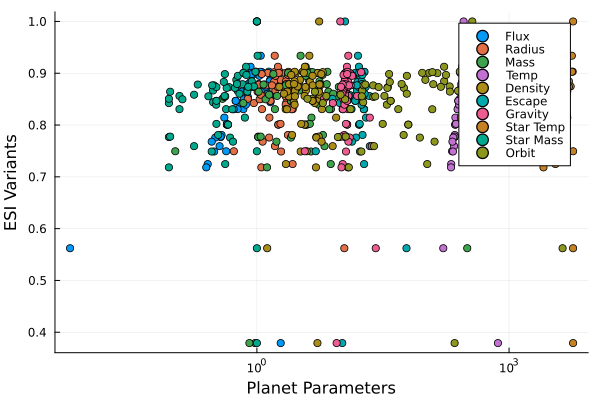

In [49]:
# visualizes the ESI Iterative equation for comparison

x_str = planet_data[2:end, 2:11]  # Assuming string x values are in the second column
y_str = planet_data[2:end, 16]  # Assuming string y values are in the third column

# Convert string data to floats
x = parse.(Float64, x_str)  # Convert x_str to Float64 array
y = parse.(Float64, y_str)  # Convert y_str to Float64 array

# Create scatter plot with converted numerical data
scatter(x, y, xlabel="Planet Parameters", ylabel="ESI Variants", legend=:topright, xscale=:log10, 
label=["Flux" "Radius" "Mass" "Temp" "Density" "Escape" "Gravity" "Star Temp" "Star Mass" "Orbit"])